# CAP 5768 - Data Science - Dr. Marques - Fall 2019

Christian Garbin

## FINAL PROJECT
## Starter code

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To get acquainted with representative datasets and problems in data science and machine learning
- To learn how to implement several different machine learning models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in 3 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 195 (plus up to 100 bonus points).

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [1]:
#Imports

# Althoug pandas_profiling is used only at a specific point, it needs to
# be imported before matplotlib untilt this issue is closed:
# https://github.com/ydataai/pandas-profiling/issues/905
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import scipy.stats as ss

-------------------
## Part 1: Decision trees

In this part, we will take another look at the Iris dataset.

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [2]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## 1.1 Your turn! (25 points)

Write code to: 

1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset. (15 pts)
2. Compute relevant summary statistics for each species. (10 pts)

## Solution

### 1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset. (15 pts)

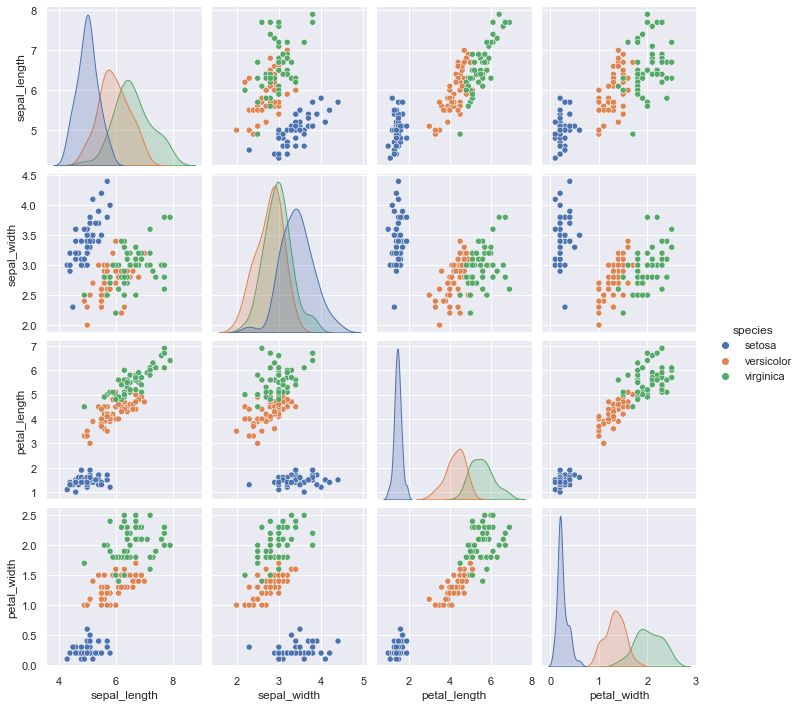

In [3]:
sns.pairplot(iris, hue='species');

### 2. Compute relevant summary statistics for each species. (10 pts)

Using DataFrame `describe()`.

In [4]:
for species in iris.species.unique():
    print('Summary statistics for {}'.format(species))
    display(iris[iris.species == species].describe())

Summary statistics for setosa


sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

Summary statistics for versicolor


sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.600000     1.500000
max        7.000000     3.400000      5.100000     1.800000

Summary statistics for virginica


sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        6.58800     2.974000      5.552000      2.02600
std         0.63588     0.322497      0.551895      0.27465
min         4.90000     2.200000      4.500000      1.40000
25%         6.22500     2.800000      5.100000      1.80000
50%         6.50000     3.000000      5.550000      2.00000
75%         6.90000     3.175000      5.875000      2.30000
max         7.90000     3.800000      6.900000      2.50000

Using the package `pandas_profiling` ([GitHub page](https://github.com/pandas-profiling/pandas-profiling) and [this article](https://towardsdatascience.com/exploring-your-data-with-just-1-line-of-python-4b35ce21a82d)).

Notes:

1. Even on the small Iris dataset it takes several seconds to run. Larger dataset may take a minute or more to complete. [This article](https://www.leehonan.com/data-profiling-with-pandas-profiling/) explains a few techniques to work with large datasets.
1. It produces an HTML report with tabs. It's not useful when exporting a notebook to formats that don't support HTML rendering (e.g. PDF).

In [5]:
profile = ProfileReport(iris, title="Iris Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.2 Your turn! (35 points)

Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (10 pts)
2. Plot the resulting decision tree. It should look similar to the plot below. (15 pts)
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. (10 pts)

![decision tree](notebook-images/decision-tree.png)

## Solution

### 1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (10 pts)

Split the dataset into the features and labels.

In [6]:
# The features: measurements
X = iris.iloc[:,:-1]
# The label: species
y = iris.species

Build the decision tree with default options.

In [7]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X, y)

DecisionTreeClassifier(random_state=0)

### 2. Plot the resulting decision tree. It should look similar to the plot below. (15 pts)

The plot requires [Graphviz](https://www.graphviz.org/). The code is based on [this article](https://scikit-learn.org/stable/modules/tree.html#tree). It exports the decision tree to a PNG file because displaying it directly on the notebooks uses SVG. Exporting a notebook that has an SGV picture to PDF is a major pain.

In [8]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None,
                      feature_names=X.columns, class_names=y.unique(),
                      filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='iris-decision-tree', format='png')

'iris-decision-tree.png'

![Iris decision tree](iris-decision-tree.png)

### 3. Perform k-fold cross-validation using k=3 and display the results. (10 pts)

Note: we need to specify a k-fold cross-validator because the default for this case is a _stratified_ k-fold_ ([`cross_val_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)):

> cv : int, cross-validation generator or an iterable, optional
>
> ...
>
> For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, `StratifiedKFold` is used. In all other cases, `KFold` is used.

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Shuffling is a must here because the dataset may be ordered
# (the folds would contain only some classes in that case)
cv = KFold(n_splits=3, shuffle=True, random_state=0)

cross_val_score(dtc, X, y, cv=cv)

array([0.98, 0.98, 0.96])

## Bonus opportunity 1 (15 points)

Make meaningful changes to the baseline code, e.g., trying different combinations of functions to measure the quality of a split, limiting the maximum depth of the tree, etc. 

Publish the code, the results, and comment on how they differ from the baseline (and your intuition as to *why* they do).

## Solution

In this section we will try some parameters that affect the tree creation.

In [10]:
from sklearn.model_selection import GridSearchCV

# First  value is the deafault value
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 4, 5],
}

# Use `verbose` to track progress - this may take several minutes
gs = GridSearchCV(tree.DecisionTreeClassifier(random_state=0),
                  param_grid, cv=5, n_jobs=-1, verbose=2)

gsc = gs.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [11]:
print("Best parameters found with grid search:")
print(gsc.best_params_)

Best parameters found with grid search:
{'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}


In [12]:
# Shuffling is a must here because the dataset may be ordered
# (the folds would contain only some classes in that case)
cv = KFold(n_splits=3, shuffle=True, random_state=0)

cross_val_score(gsc.best_estimator_, X, y, cv=cv)

array([0.96, 0.98, 0.94])

Conclusion: grid searched resulted in the default values for `criterion` and `max_depth`, and a new value for `splitter`. However, the final scores were on average worse than the default values. This indicates the dataset is relatively simple (it is indeed), so not much fine tuning is needed to make a decision tree perform well on it.

-------------------
## Part 2: Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28 $\times$ 28 pixels. They are saved in the csv data files `mnist_train.csv` and `mnist_test.csv`. 

Every line of these files consists of a grayscale image and its label, i.e. 785 numbers between 0 and 255:
- The first number of each line is the label, i.e. the digit which is depicted in the image. 
- The following 784 numbers are the pixels of the 28 $\times$ 28 image.

The Python code below loads the images from CSV files, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [13]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "mnist_train.csv.gz", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv.gz", 
                       delimiter=",") 

In [14]:
test_data.shape

(10000, 785)

In [15]:
train_imgs = np.asfarray(train_data[:, 1:])/255.0
test_imgs = np.asfarray(test_data[:, 1:])/255.0
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [16]:
train_labels.shape

(60000, 1)

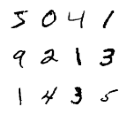

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(2, 2))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_imgs[i].reshape((28,28)), cmap="Greys")
    axi.set(xticks=[], yticks=[])

## 2.1 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy will be around 83.5%

## Solution

Prepare the data: `fit()` and `predict()` expect a 1D array. However, the labels are stored in a multi-dimensional array. Here we will reshape them into a 1D array. This could be done inline, when calling `fit()` and `reshape()`. It's done here for clarity and to document the process.

In [18]:
print('Labels before reshaping')
print(train_labels.shape)
print(train_labels[:3])

train_labels_1d = train_labels.ravel()
test_labels_1d = test_labels.ravel()

print('\nLabels after reshaping')
print(train_labels_1d.shape)
print(train_labels_1d[:3])

Labels before reshaping
(60000, 1)
[[5.]
 [0.]
 [4.]]

Labels after reshaping
(60000,)
[5. 0. 4.]


### 1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's MultinomialNB() with default options and using the raw pixel values as features. (5 pts)

In [19]:
from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB()
nbc.fit(train_imgs, train_labels_1d)

MultinomialNB()

### 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def evaluate_classifier(clf):
    print('Classifier: {}'.format(clf.__class__.__name__))

    pred = clf.predict(test_imgs)

    print('\nAccuracy: {}'.format(accuracy_score(test_labels_1d, pred)))

    print('\nConfusion matrix (text):')
    cm = confusion_matrix(test_labels_1d, pred)
    print(cm)
          
    print('\nConfusion matrix (heatmap) - mistakes only:')
    # Remove correct predictions to make mistakes stand out
    np.fill_diagonal(cm, 0)
    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
    ax.set_ylabel('Actual digit')
    ax.set_xlabel('Predicted digit')
    plt.show()

Classifier: MultinomialNB

Accuracy: 0.8357

Confusion matrix (text):
[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    1    6    0   52    1]
 [  15   11  858   24   10    3   32   12   66    1]
 [   4   11   34  852    1   19    7   14   41   27]
 [   2    2    6    0  731    0   25    1   38  177]
 [  23   12    6  108   18  586   17    6   79   37]
 [  18   13   17    1    8   24  859    0   18    0]
 [   1   21   11    5   18    0    1  861   41   69]
 [   6   26   13   55   14   27    8    9  776   40]
 [   6    8    3   11   65    9    1   18   27  861]]

Confusion matrix (heatmap) - mistakes only:


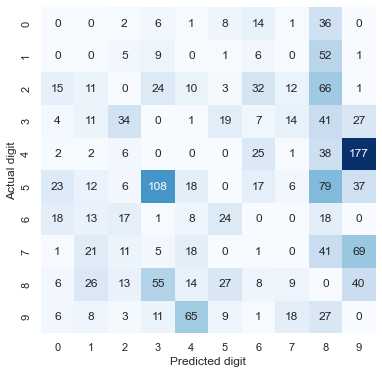

In [21]:
evaluate_classifier(nbc)

## 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy should be > 90%

## Solution

### 1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. (5 pts)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# n_jobs=-1 speeds it up by about 3x on a MacBook Pro 2019 13" i5
# n_estimator=10 to avoid future warning
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10, random_state=0)
rfc.fit(train_imgs, train_labels_1d)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

### 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Classifier: RandomForestClassifier

Accuracy: 0.9469

Confusion matrix (text):
[[ 969    2    1    0    0    0    4    1    2    1]
 [   0 1120    4    4    1    1    2    0    3    0]
 [   9    1  980    5    3    1    6   11   14    2]
 [   1    1   12  955    0   16    1    7   12    5]
 [   2    3    2    1  936    0    6    3    8   21]
 [   7    2    2   34    8  812   10    2    5   10]
 [  16    3    3    1    4   12  917    0    2    0]
 [   4    8   27    1    6    0    0  967    4   11]
 [   6    1   13   22    6   16    7    9  886    8]
 [   9    4    6   11   29    8    1    7    7  927]]

Confusion matrix (heatmap) - mistakes only:


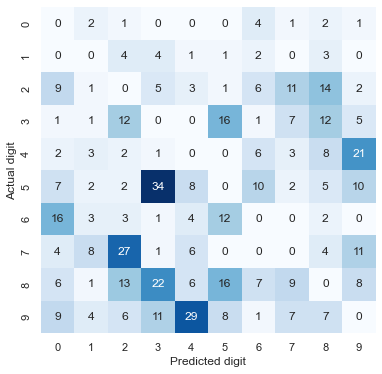

In [23]:
evaluate_classifier(rfc)

## 2.3 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

## Solution

### 1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. (5 pts)

This section will use grid search to find a better `RandomForestClassifer`.

The choice of the classifier was driven by:

1. Being able to compare with `RandomForestClassifier` with default values used in the section above, i.e. how much better can it get if we spend time fine-turning it.
1. Concentrating more on the process of choosing a classifier, than the classifier itself. More specifically, to spend more time learning how to use `GridSearchCV` and analyze its results, to apply it in the future with other classifier.

Parameters to try (and to not try):

* `n_estimators`: the default value of 10, and larger values, to create larger ensembles. The premise is that more trese result in better accuracy.
* `bootstrap`: the default value of `True` and `False` (motivated by [this discussion in Stack Overflow](https://stats.stackexchange.com/questions/354336/what-happens-when-bootstrapping-isnt-used-in-sklearn-randomforestclassifier)).
* `min_samples_split` and `min_sample_leaf`: _not_ used because at first I thought we should try larger values of these two parameters to reduce overfitting for large values of `n_estimators`, but the fact that we have an ensemble already reduces overfitting: "_...uses averaging to improve the predictive accuracy and control over-fitting_" ([scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).
* `criterion`: _not_ used because "[s]tudies have shown that the choice of impurity measure has little effect on the peform of decision tree induction algorithms." ([source](https://stats.stackexchange.com/questions/19639/which-is-a-better-cost-function-for-a-random-forest-tree-gini-index-or-entropy), and also [this blog post](https://www.garysieling.com/blog/sklearn-gini-vs-entropy-criteria), where the first source came from).

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 100, 200, 300],
    'bootstrap': [True, False],
}

# Use `verbose` to track progress - this may take several minutes
# Use cv=3 as compromise between lower runtime and good validation
gs = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0),
                  param_grid, cv=3, n_jobs=-1, verbose=1)

gsc = gs.fit(train_imgs, train_labels_1d)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......criterion=gini, max_depth=None, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=4, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=4, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .criterion=entropy, max_depth=None, splitter=random; total time=   0.0s
[CV] END .criterion=entropy, max_depth=None, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s


/Users/cgarbin/projects/cap5768-introduction-to-data-science/env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ......criterion=gini, max_depth=None, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=None, splitter=best; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=None, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=5, splitter=random; total time=   0.0s
[CV] END ....criterion=gini, max_depth=None, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

In [25]:
print("Best parameters found with grid search:")
print(gsc.best_params_)

Best parameters found with grid search:
{'bootstrap': False, 'n_estimators': 300}


### 2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Classifier: RandomForestClassifier

Accuracy: 0.9739

Confusion matrix (text):
[[ 972    0    1    0    0    1    2    1    3    0]
 [   0 1124    3    2    0    2    2    0    1    1]
 [   6    0 1001    4    3    0    3    9    6    0]
 [   0    0    9  977    0    5    0    9    8    2]
 [   1    0    1    0  958    0    5    1    2   14]
 [   3    0    1    8    3  865    5    1    4    2]
 [   6    3    0    0    2    4  940    0    3    0]
 [   1    2   17    1    0    0    0 1000    1    6]
 [   4    0    5    6    2    5    2    3  937   10]
 [   5    4    2    9   10    2    1    4    7  965]]

Confusion matrix (heatmap) - mistakes only:


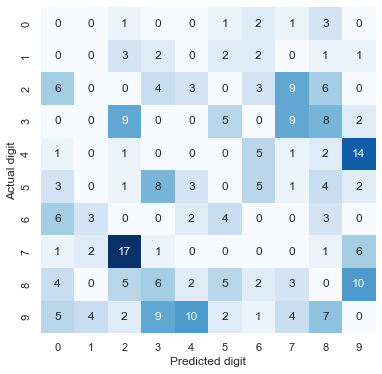

In [26]:
evaluate_classifier(gsc.best_estimator_)

Show the details of all classifiers tried in the grid search:

In [27]:
df = pd.DataFrame(gsc.cv_results_)
# Use only the columns we are intersted int
df = df[['rank_test_score', 'mean_test_score',
         'param_bootstrap', 'param_n_estimators']]
df.set_index('rank_test_score', inplace=True)
display(df.sort_values(by='rank_test_score'))

mean_test_score param_bootstrap param_n_estimators
rank_test_score                                                    
1                       0.970150           False                300
2                       0.969433           False                200
3                       0.968933           False                100
4                       0.966233            True                300
5                       0.965717            True                200
6                       0.964333            True                100
7                       0.947317           False                 10
8                       0.939967            True                 10

The difference between the ensemble with 200 and the one with 300 estimators is insignificant. For most applications, the smaller ensemble, with 200 estimators, would be better (use less memory and estimate faster). Depending on how accuracy the application needs, even the ensemble with 100 estimators would be a good choice.

-------------------
## Part 3: Face Recognition 

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

Hint: you will have to install Pillow for this part. See https://pillow.readthedocs.io/en/stable/

In [28]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


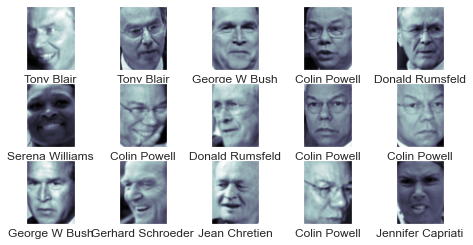

In [29]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 3.1 Your turn! (55 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. (10 pts)
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. (10 pts)
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. (25 pts)
4. Display examples of correct and incorrect predictions (at least 5 of each). (10 pts)

## Solution

Credits: based on the [support vector machine examples from the Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=ta09ltcksXnR.)

Split into a training and a testing set before starting.

In [30]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                stratify=faces.target,
                                                test_size=0.25, random_state=0)

Plot the classes to see if we have training and testing sets that are (roughly) equally distributed.

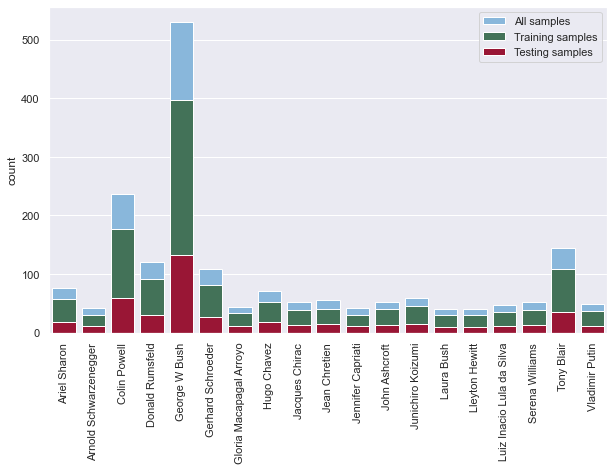

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x=faces.target, label='All samples', palette=['#7CB9E8'])
sns.countplot(x=ytrain, label='Training samples', palette=['#3B7A57'])
sns.countplot(x=ytest, label='Testing samples', palette=['#AF002A'])
plt.xticks(range(len(faces.target_names)), faces.target_names,
           rotation='vertical')
plt.legend()
plt.show()

The high class imbalance shown in the graph also explains why we needed to use `stratify` in the split and why we will use `class_weight='balanced'` later in the code.

### 1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. (10 pts)

Although  [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb#scrollTo=kOGVbQZWn4J-) use the old `RandomizedPCA`(today's `svd_solver='randomized'`), using a randomized SVC resulted in a lower accuracy, so it was removed.

Why use `whiten=True` ([source](http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/)):

> If we are training on images, the raw input is redundant, since adjacent pixel values are highly correlated. The goal of whitening is to make the input less redundant; more formally, our desiderata are that our learning algorithms sees a training input where (i) the features are less correlated with each other, and (ii) the features all have the same variance.

This parameter was crucial to get over 70% accuracy. When set to `False`, accuracy was below 30%.

In [32]:
from sklearn.decomposition import PCA

NUM_COMPONENTS = 120
pca = PCA(n_components=NUM_COMPONENTS, whiten=True, random_state=0)

### 2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced features. (10 pts)

In [33]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)
model = make_pipeline(pca, svc)

param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

# Use `verbose` to track progress - this may take several minutes
# Choice of parameters:
#   cv=3: silence future warning and keep it to a reasonable value
#   n_jobs=-1: run as many searches in parallel as possible
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(Xtrain, ytrain);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [34]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


### 3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. (25 pts)

In [35]:
svcclf = grid.best_estimator_
pred = svcclf.predict(Xtest)

In [36]:
print('\nAccuracy: {}'.format(accuracy_score(ytest, pred)))


Accuracy: 0.7987152034261242


In [37]:
def show_faces_cm(pred):
    print('\nConfusion matrix (heatmap) - mistakes only:')

    cm = confusion_matrix(ytest, pred)
    # Remove correct predictions to make mistakes stand out
    np.fill_diagonal(cm, 0)

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues',
                     xticklabels=faces.target_names,
                     yticklabels=faces.target_names)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()


Confusion matrix (heatmap) - mistakes only:


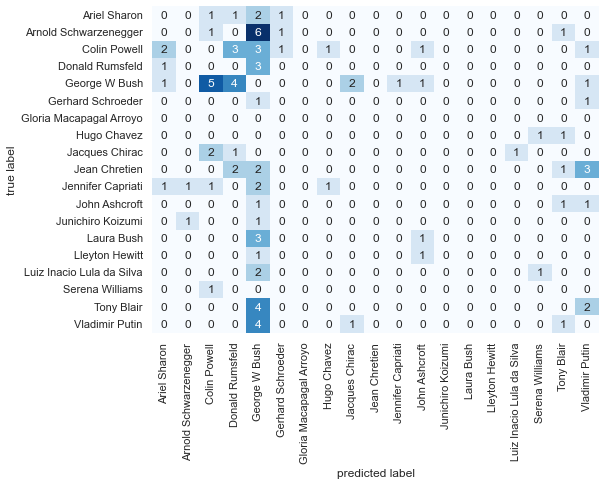

In [38]:
show_faces_cm(pred)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(ytest, pred,
                            target_names=faces.target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.74      0.74      0.74        19
    Arnold Schwarzenegger       0.50      0.18      0.27        11
             Colin Powell       0.81      0.80      0.80        59
          Donald Rumsfeld       0.70      0.87      0.78        30
            George W Bush       0.77      0.89      0.83       133
        Gerhard Schroeder       0.89      0.93      0.91        27
  Gloria Macapagal Arroyo       1.00      1.00      1.00        11
              Hugo Chavez       0.89      0.89      0.89        18
           Jacques Chirac       0.75      0.69      0.72        13
            Jean Chretien       1.00      0.43      0.60        14
        Jennifer Capriati       0.83      0.45      0.59        11
            John Ashcroft       0.71      0.77      0.74        13
        Junichiro Koizumi       1.00      0.87      0.93        15
               Laura Bush       1.00      0.60      0.75     

### 4. Display examples of correct and incorrect predictions (at least 5 of each). (10 pts)

Auxiliary function to plot faces.

Note: uses some global variables. In the production code should they should be parameters for the function.

In [40]:
def plot_faces(faces_to_show, labels_to_show, num_faces, show_name=True):
    # `squeeze=False` so `ax.flat` works with only one picture
    fig, ax = plt.subplots(1, num_faces, figsize=(num_faces, 1.5),
                           squeeze=False)

    for i, axi in enumerate(ax.flat):
        axi.imshow(faces_to_show[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        if show_name:
            axi.set_xlabel(faces.target_names[labels_to_show[i]].split()[-1][:10])
    plt.show()

Show correct and incorrrect predictions, one after the other.


Ariel Sharon --------------
10 (of 14) correct predictions


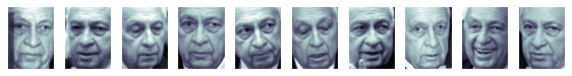

5 (of 5) Ariel Sharon predicted as someone else


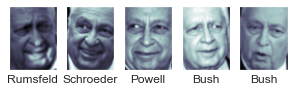

5 (of 5) someone else predicted as Ariel Sharon


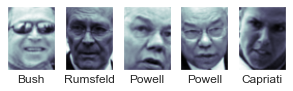


Arnold Schwarzenegger --------------
2 (of 2) correct predictions


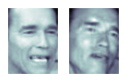

9 (of 9) Arnold Schwarzenegger predicted as someone else


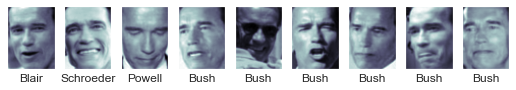

2 (of 2) someone else predicted as Arnold Schwarzenegger


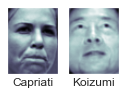


Colin Powell --------------
10 (of 47) correct predictions


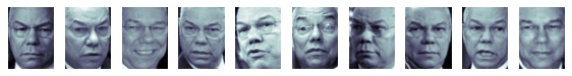

10 (of 12) Colin Powell predicted as someone else


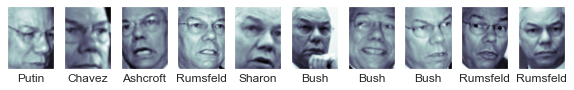

10 (of 11) someone else predicted as Colin Powell


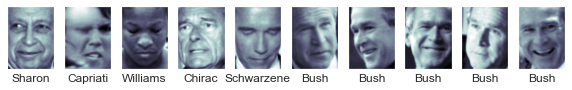


Donald Rumsfeld --------------
10 (of 26) correct predictions


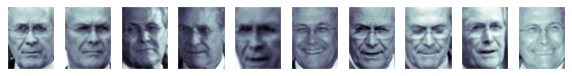

4 (of 4) Donald Rumsfeld predicted as someone else


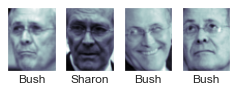

10 (of 11) someone else predicted as Donald Rumsfeld


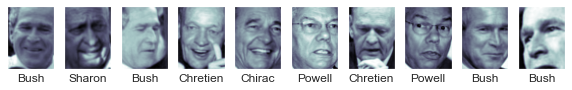


George W Bush --------------
10 (of 118) correct predictions


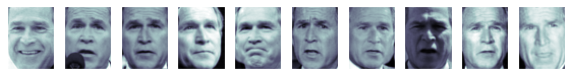

10 (of 15) George W Bush predicted as someone else


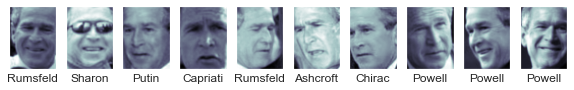

10 (of 35) someone else predicted as George W Bush


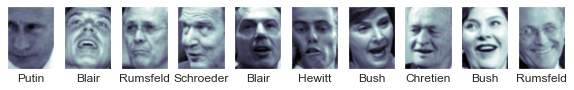


Gerhard Schroeder --------------
10 (of 25) correct predictions


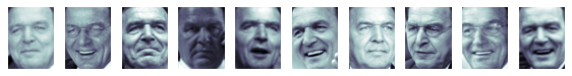

2 (of 2) Gerhard Schroeder predicted as someone else


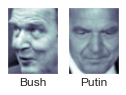

3 (of 3) someone else predicted as Gerhard Schroeder


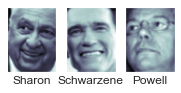


Gloria Macapagal Arroyo --------------
10 (of 11) correct predictions


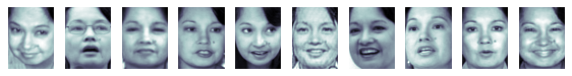

0 (of 0) Gloria Macapagal Arroyo predicted as someone else
0 (of 0) someone else predicted as Gloria Macapagal Arroyo

Hugo Chavez --------------
10 (of 16) correct predictions


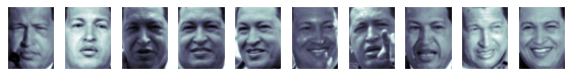

2 (of 2) Hugo Chavez predicted as someone else


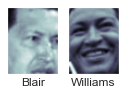

2 (of 2) someone else predicted as Hugo Chavez


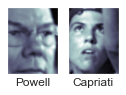


Jacques Chirac --------------
9 (of 9) correct predictions


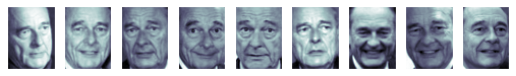

4 (of 4) Jacques Chirac predicted as someone else


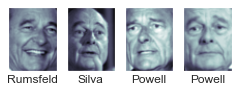

3 (of 3) someone else predicted as Jacques Chirac


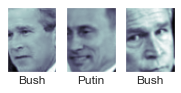


Jean Chretien --------------
6 (of 6) correct predictions


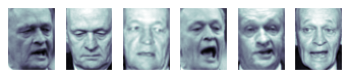

8 (of 8) Jean Chretien predicted as someone else


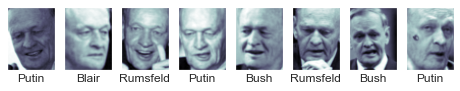

0 (of 0) someone else predicted as Jean Chretien

Jennifer Capriati --------------
5 (of 5) correct predictions


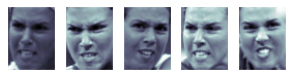

6 (of 6) Jennifer Capriati predicted as someone else


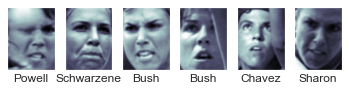

1 (of 1) someone else predicted as Jennifer Capriati


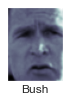


John Ashcroft --------------
10 (of 10) correct predictions


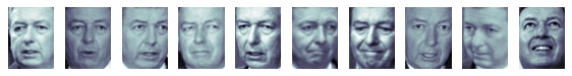

3 (of 3) John Ashcroft predicted as someone else


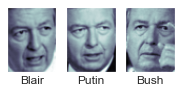

4 (of 4) someone else predicted as John Ashcroft


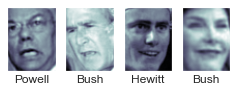


Junichiro Koizumi --------------
10 (of 13) correct predictions


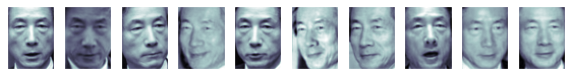

2 (of 2) Junichiro Koizumi predicted as someone else


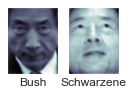

0 (of 0) someone else predicted as Junichiro Koizumi

Laura Bush --------------
6 (of 6) correct predictions


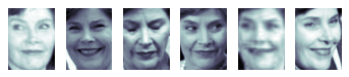

4 (of 4) Laura Bush predicted as someone else


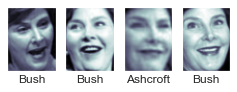

0 (of 0) someone else predicted as Laura Bush

Lleyton Hewitt --------------
8 (of 8) correct predictions


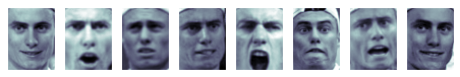

2 (of 2) Lleyton Hewitt predicted as someone else


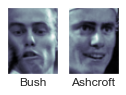

0 (of 0) someone else predicted as Lleyton Hewitt

Luiz Inacio Lula da Silva --------------
9 (of 9) correct predictions


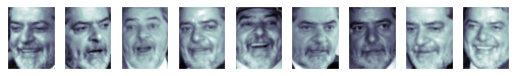

3 (of 3) Luiz Inacio Lula da Silva predicted as someone else


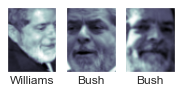

1 (of 1) someone else predicted as Luiz Inacio Lula da Silva


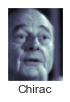


Serena Williams --------------
10 (of 12) correct predictions


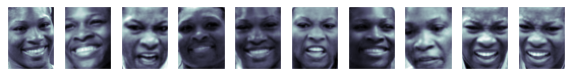

1 (of 1) Serena Williams predicted as someone else


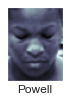

2 (of 2) someone else predicted as Serena Williams


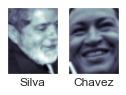


Tony Blair --------------
10 (of 30) correct predictions


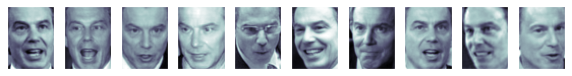

6 (of 6) Tony Blair predicted as someone else


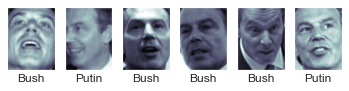

5 (of 5) someone else predicted as Tony Blair


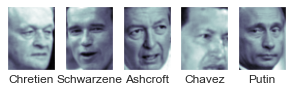


Vladimir Putin --------------
6 (of 6) correct predictions


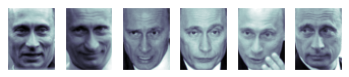

6 (of 6) Vladimir Putin predicted as someone else


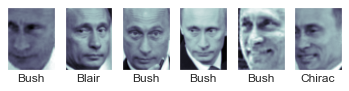

9 (of 9) someone else predicted as Vladimir Putin


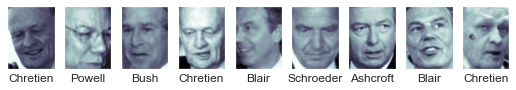

In [41]:
for i, name in enumerate(faces.target_names):
    print('\n{} --------------'.format(name))

    # Correct predictions
    mask = (ytest == i) & (pred == i)
    sum_faces = sum(mask)
    num_faces = min(10, sum(mask))
    print('{} (of {}) correct predictions'.format(num_faces, sum_faces))
    plot_faces(Xtest[mask], pred[mask], num_faces, show_name=False)

    # False negative: predicted as someone else
    mask = (ytest == i) & (pred != i)
    sum_faces = sum(mask)
    num_faces = min(10, sum(mask))
    print('{} (of {}) {} predicted as someone else'.format(
        num_faces, sum_faces, name))
    if num_faces > 0:
        plot_faces(Xtest[mask], pred[mask], num_faces)

    # False positive: someone else predicted as this person
    mask = (ytest != i) & (pred == i)
    sum_faces = sum(mask)
    num_faces = min(10, sum(mask))
    print('{} (of {}) someone else predicted as {}'.format(
        num_faces, sum_faces, name))
    if num_faces > 0:
        plot_faces(Xtest[mask], ytest[mask], num_faces)

## Bonus opportunity 2 (35 points)

Make meaningful changes to the baseline code, e.g.:

- trying different combinations of SVM parameters following a grid search cross-validation approach.
- experimenting with different values of number of components for the PCA and showing how much of the variance they explain (i.e., plotting the cumulative explained variance as a function of the number of components).
- using "data augmentation" to generate additional training images (for under-represented classes).

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

### trying different combinations of SVM parameters following a grid search cross-validation approach.

This was done in [part 2 above](#2.-Build-and-fit-a-multi-class-SVM-classifier,-with-sensible-initialization-options,-and-using-the-PCA-reduced-features.-(10-pts)).

### experimenting with different values of number of components for the PCA and showing how much of the variance they explain (i.e., plotting the cumulative explained variance as a function of the number of components).

Step 1: create a PCA with the maximum number of components, to inspect variabilit of the entire range.

In [42]:
# The maximum number of components that PCA accepts
n_components = min(len(faces.data), len(faces.data[0]))
print('Total number of components: {}'.format(n_components))

pca_var = PCA(n_components=n_components, whiten=True, random_state=0)
pca_var.fit(faces.data);

Total number of components: 1867


Step 2: calculate and plot the cumulative variance (as a function of the number of components).

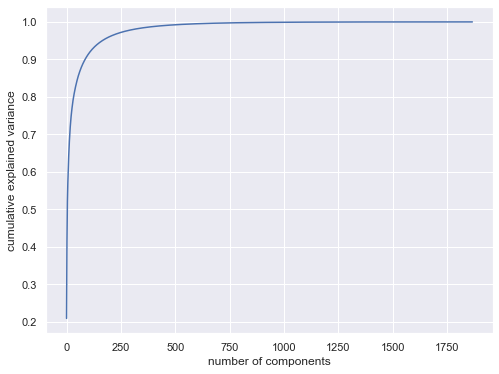

In [43]:
cum_var = np.cumsum(pca_var.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cum_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Step 3: calculate the number of components needed to explain several levels of variability.

In [44]:
for percent in [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]:
    break_point = cum_var[-1] * percent
    n_components_pct = np.argmax(cum_var >= break_point)
    print('Number of components for {:.0%} variance:'
          ' {:3d} (actual percentage: {:.5%})'.\
          format(percent, n_components_pct, cum_var[n_components_pct]))

Number of components for 10% variance:   0 (actual percentage: 20.94841%)
Number of components for 25% variance:   1 (actual percentage: 34.14249%)
Number of components for 50% variance:   4 (actual percentage: 52.08299%)
Number of components for 75% variance:  22 (actual percentage: 75.39256%)
Number of components for 90% variance:  86 (actual percentage: 90.09166%)
Number of components for 99% variance: 442 (actual percentage: 99.00358%)


Conclusion: 442 components are able to explain 99% of variability in this dataset.

How one of the images looks like when using the number of components that explains 99% of variability.

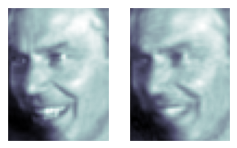

In [45]:
pca_pic = PCA(n_components=442, whiten=True, random_state=0)
pca_pic.fit(faces.data)

components = pca_pic.transform(faces.data)
projected = pca_pic.inverse_transform(components)

fig, ax = plt.subplots(1, 2, figsize=(4, 4),
                       subplot_kw={'xticks':[], 'yticks':[]})
ax[0].imshow(faces.data[0].reshape(62, 47), cmap='bone')
ax[1].imshow(projected[0].reshape(62, 47), cmap='bone');

### using "data augmentation" to generate additional training images (for under-represented classes).

Sources:
    
* [Thomas Himblot's Medium article](https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec)
* [Conner Shorten's Towards Data Science article](https://towardsdatascience.com/image-augmentation-examples-in-python-d552c26f2873)

Calculate the number of images we have to add for each person to match the person with the most number of images.

In [46]:
num_images_person = np.bincount(ytrain)
max_images = max(num_images_person)
num_missing_images = max_images - num_images_person

An auxiliary function to augment images.

In [47]:
import skimage as sk
from skimage import transform

# To make it consistent across runs
np.random.seed(0)

def add_images(person, num_images_to_add, X, y, show_changes=True):
    '''Augment images for the given person. Images are appended to the existing
    image array. Label array is also extended to match the images array.'''
    if num_images_to_add == 0:
        return X, y
    
    existing_images = Xtrain[ytrain == person]
    num_existing_images = len(existing_images)

    # The original images, before manipulating
    old_images = []
    # Images after manipulation
    new_images = []
    # The changes applied to the image
    changes = []

    for _ in range(num_images_to_add):
        # Pick one of the existing images at random (with substitution)
        image = existing_images[np.random.randint(0, num_existing_images)]
        old_images.append(image)
        image = image.reshape(62, 47)

        # Rotate right or left by a random amount
        # Range of angles found empirically
        random_degree = np.random.randint(-10, 10)
        image = transform.rotate(image, random_degree)
        change = '{}'.format(random_degree)

        # Flip some of the images horizontally
        if np.random.randint(0, 100) <= 25:
            image = np.fliplr(image)
            change = '{},f'.format(change)

        # Intensity (similar to brightness/contrast)
        # Code from https://stackoverflow.com/a/19384041/336802
        phi, theta = 1, 1 # need to play with these values
        max_intensity = 255.0
        if np.random.randint(0, 100) <= 10:
            # Increase intensity
            image = (max_intensity/phi) * (image/(max_intensity/theta)) ** 0.5
            change = '{},i'.format(change)
        elif np.random.randint(0, 100) <= 10:
            # Decrease intensity
            image = (max_intensity/phi) * (image/(max_intensity/theta)) ** 2
            change = '{},d'.format(change)
            
        new_images.append(image.ravel())
        changes.append(change)

    new_labels = [person] * num_images_to_add

    if show_changes:
        N = 8
        print('Before changes ({} samples):'.format(N))
        plot_faces(old_images[:N], new_labels[:N], N, False)
        print('After changes:')
        plot_faces(new_images[:N], new_labels[:N], N, False)
        print(changes[:8])
        
    X = np.append(X, np.array(new_images), axis=0)
    y = np.append(y, np.array(new_labels))
    
    return X, y

Add new images for each person. After this is done, all persons in the dataset will have the same number of images.


Adding 339 images for Ariel Sharon
Before changes (8 samples):


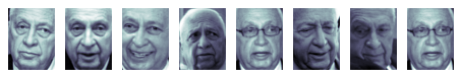

After changes:


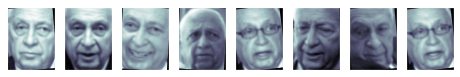

['5', '-1', '-4', '-4', '7', '-1,f', '5', '7']

Adding 366 images for Arnold Schwarzenegger
Before changes (8 samples):


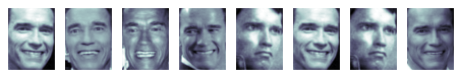

After changes:


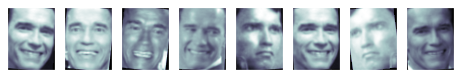

['-5', '-6', '7,f', '3,f', '4', '4', '-8,f,i', '4']

Adding 220 images for Colin Powell
Before changes (8 samples):


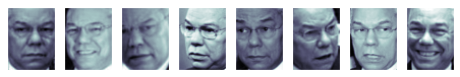

After changes:


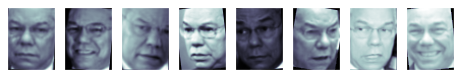

['3,f', '-5,d', '1,f', '7', '4,d', '-10', '1,f,i', '7,i']

Adding 306 images for Donald Rumsfeld
Before changes (8 samples):


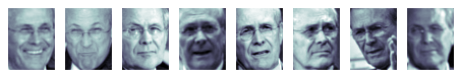

After changes:


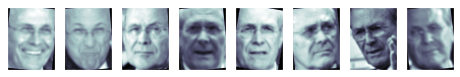

['-6', '-5,f', '-3,f', '-6,f', '-10', '6', '0', '7']

Adding   0 images for George W Bush

Adding 315 images for Gerhard Schroeder
Before changes (8 samples):


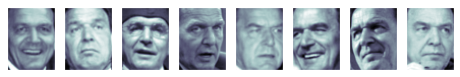

After changes:


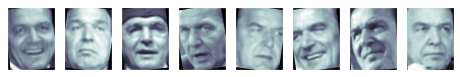

['7', '-8', '7', '-10,f', '-8', '8', '4', '3']

Adding 364 images for Gloria Macapagal Arroyo
Before changes (8 samples):


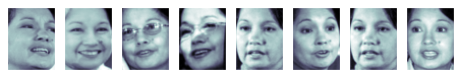

After changes:


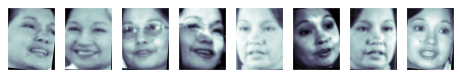

['-7', '2,f', '-5', '-4,f', '2,i', '9,d', '2,f', '6,f']

Adding 344 images for Hugo Chavez
Before changes (8 samples):


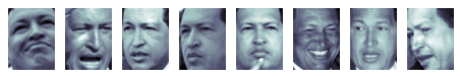

After changes:


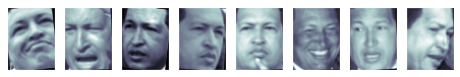

['6', '-3,f', '-7,d', '4,f', '-2,f', '2', '4', '-2,f']

Adding 358 images for Jacques Chirac
Before changes (8 samples):


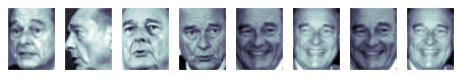

After changes:


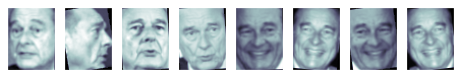

['-1,i', '-10,f', '-4,f', '5,i', '2', '-6', '-8,f', '-7,f']

Adding 356 images for Jean Chretien
Before changes (8 samples):


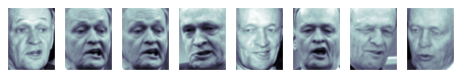

After changes:


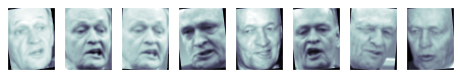

['9,i', '1,i', '-4,i', '7', '6', '-7,f', '-5', '5']

Adding 366 images for Jennifer Capriati
Before changes (8 samples):


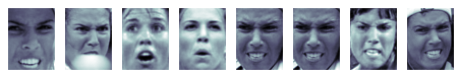

After changes:


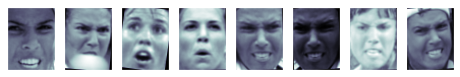

['0', '-5', '-8', '1', '-2,f', '4,d', '2,i', '5']

Adding 357 images for John Ashcroft
Before changes (8 samples):


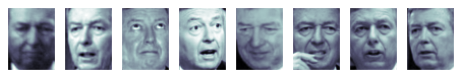

After changes:


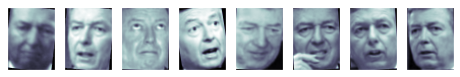

['-7', '-6', '-2', '9', '3,f', '4', '4', '1']

Adding 352 images for Junichiro Koizumi
Before changes (8 samples):


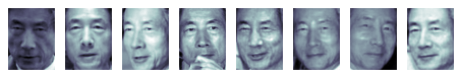

After changes:


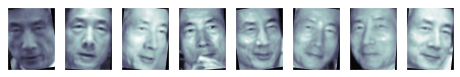

['9', '4,f', '7,f', '5', '-9,f', '7,f', '4,f', '6,f']

Adding 366 images for Laura Bush
Before changes (8 samples):


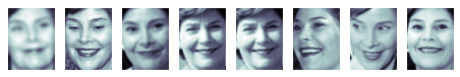

After changes:


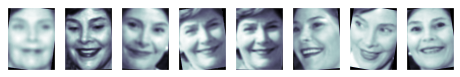

['-8', '2,d', '4,f', '9', '-1', '5', '-10', '9']

Adding 366 images for Lleyton Hewitt
Before changes (8 samples):


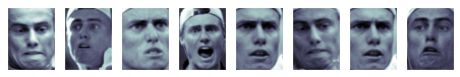

After changes:


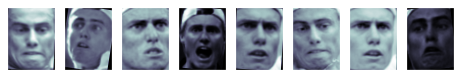

['-3', '-9', '0', '-7,d', '-4', '0,i', '-1,i', '7,d']

Adding 361 images for Luiz Inacio Lula da Silva
Before changes (8 samples):


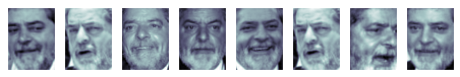

After changes:


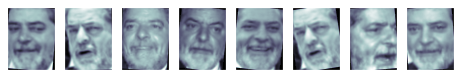

['-5', '1', '-4', '-8', '-7', '9', '5', '5']

Adding 358 images for Serena Williams
Before changes (8 samples):


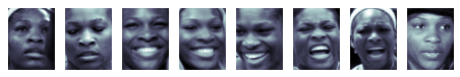

After changes:


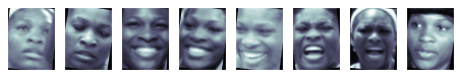

['-6,i', '9,f', '-5', '8,f', '-7,i', '-7,f', '-6', '9,f']

Adding 289 images for Tony Blair
Before changes (8 samples):


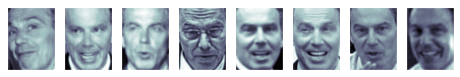

After changes:


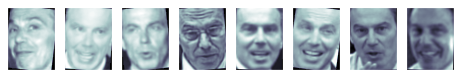

['-7', '5,f,i', '7', '5', '-3', '8,f', '1', '-2']

Adding 360 images for Vladimir Putin
Before changes (8 samples):


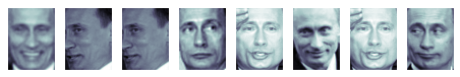

After changes:


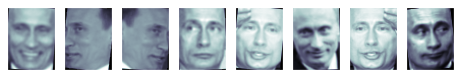

['-4', '-7', '4,f', '-3,f', '-6', '2', '0,f', '-7,f,d']


In [48]:
X = Xtrain
y = ytrain

for i, name in enumerate(faces.target_names):
    print('\nAdding {:3d} images for {}'.format(num_missing_images[i], name))
    X, y = add_images(i, num_missing_images[i], X, y)

Check that we indeed added the number images we meant to add.

In [49]:
assert(np.all(np.bincount(y) == max_images))

Shuffle the dataset to ensure we don't have large seqeunce of images for the same person. Some machine learning algorithms are sensitive to the order of the samples. Althought we don't need to shuffle for random forests, this prevents silly mistakes in the future, if we try other solutions.

In [50]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

Train a new support vector classifer with the augmented dataset.

In [51]:
pca = PCA(n_components=NUM_COMPONENTS, whiten=True, random_state=0)
svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)
model = make_pipeline(pca, svc)

# This range of values was tweaked to work with the augmented dataset
param_grid = {
    'svc__C': [1, 5, 10],
    'svc__gamma': [0.001, 0.01, 0.05]
}

# Use `verbose` to track progress - this may take several minutes
# Choice of parameters:
#   cv=3: silence future warning and keep it to a reasonable value
#   n_jobs=-1: run as many searches in parallel as possible
grid_aug = GridSearchCV(model, param_grid, cv=3, n_jobs=-1,
                        verbose=1)
grid_aug.fit(X, y);

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .......................svc__C=10, svc__gamma=0.0001; total time=   0.7s
[CV] END .......................svc__C=50, svc__gamma=0.0005; total time=   0.6s
[CV] END .........................svc__C=50, svc__gamma=0.01; total time=   0.5s


/Users/cgarbin/projects/cap5768-introduction-to-data-science/env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ........................svc__C=1, svc__gamma=0.0001; total time=   0.6s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   0.6s
[CV] END ........................svc__C=5, svc__gamma=0.0005; total time=   0.5s
[CV] END .........................svc__C=5, svc__gamma=0.005; total time=   0.5s
[CV] END .......................svc__C=10, svc__gamma=0.0005; total time=   0.5s
[CV] END .........................svc__C=10, svc__gamma=0.01; total time=   0.5s
[CV] END ........................svc__C=50, svc__gamma=0.001; total time=   0.5s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=   0.6s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   0.6s
[CV] END .........................svc__C=5, svc__gamma=0.001; total time=   0.5s
[CV] END .........................svc__C=5, svc__gamma=0.005; total time=   0.5s
[CV] END .......................svc__C=10, svc__gamma=0.0005; total time=   0.5s
[CV] END ...................

In [52]:
print(grid_aug.best_params_)

{'svc__C': 5, 'svc__gamma': 0.01}


Evaluate the classifier with the test dataset.

In [53]:
svcclf_aug = grid_aug.best_estimator_
pred_aug = svcclf_aug.predict(Xtest)

In [54]:
print('\nAccuracy: {}'.format(accuracy_score(ytest, pred_aug)))


Accuracy: 0.7794432548179872



Confusion matrix (heatmap) - mistakes only:


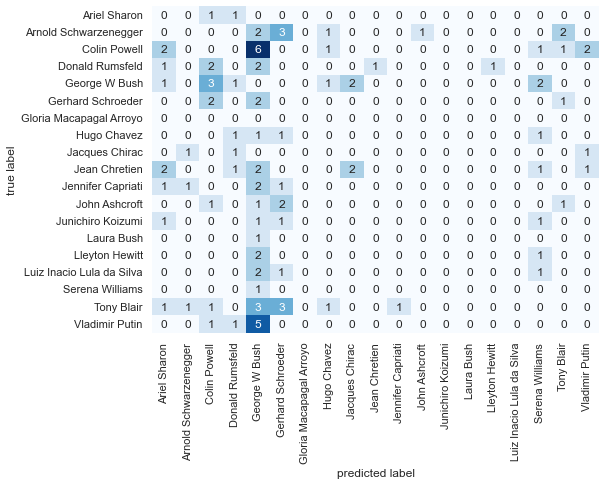

In [55]:
show_faces_cm(pred_aug)

In [56]:
print(classification_report(ytest, pred_aug,
                            target_names=faces.target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.65      0.89      0.76        19
    Arnold Schwarzenegger       0.40      0.18      0.25        11
             Colin Powell       0.81      0.78      0.79        59
          Donald Rumsfeld       0.79      0.77      0.78        30
            George W Bush       0.79      0.92      0.85       133
        Gerhard Schroeder       0.65      0.81      0.72        27
  Gloria Macapagal Arroyo       1.00      1.00      1.00        11
              Hugo Chavez       0.78      0.78      0.78        18
           Jacques Chirac       0.71      0.77      0.74        13
            Jean Chretien       0.83      0.36      0.50        14
        Jennifer Capriati       0.86      0.55      0.67        11
            John Ashcroft       0.89      0.62      0.73        13
        Junichiro Koizumi       1.00      0.73      0.85        15
               Laura Bush       1.00      0.90      0.95     

Conclusion of this exercise: it did not improve the results. A possible reason for this result is that the image augmentation code is rather simple. It could be enhanced with more sophisticated image augmentation techniques, such as zooming and distortions.

It could also be that this accuracy is the limit of the SVM approach. [This paper](https://iopscience.iop.org/article/10.1088/1742-6596/1004/1/012001/meta) reported small (less than 0.5%) accuracy improvement when data augmentation is used with an SVM classifier. It may be time to switch to another classifier.

This approach is also not scalable. It creates the entire augmented dataset in memory. Production code should store the augmented dataset on disk and use a [generator function](https://wiki.python.org/moin/Generators) to return them.

## Bonus opportunity 3 (50 points)

Write code to incorporate face detection capabilities (see "Face Detection Pipeline" in the textbook), improve it to include non-maximal suppression (to produce 'clean' detection results) and demonstrate how it can be used to:
- load an image that the model has never seen before (e.g. an image you downloaded from the Internet)
- locate (i.e. detect) the face in the image
- resize the face region to 62 $\times$ 47 pixels
- run the face recognition code you wrote above and produce a message showing the closest 'celebrity' from the dataset.

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

This solution uses OpenCV face detection with Haar Cascades.

This approach was chosen because OpenCV is a well-known image-processing framework. I wanted to be more familiar with it.

Sources of information used to build this solution:


* [How sliding windows for object detection works](https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/), the general concept of sliding a window through an image to detect objects, with Python and OpenCV code.
* [How Haar Cascade works](http://www.willberger.org/cascade-haar-explained/), including an an animation of the Haar cascades working through the image segments.
* [OpenCV official face detection tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html).
* [How the face detection bounding box is determined](https://answers.opencv.org/question/177106/face-detection-bounding-box/).


Note: this solution does not use non-maximum supression for lack of time and because OpenCV's face detector works fairly well out of the box already. We could run the detector with different parameters and apply OpenCV's own non-maximum suppression calculater, [`NMSBoxes()`](https://docs.opencv.org/master/d6/d0f/group__dnn.html#ga9d118d70a1659af729d01b10233213ee), afterwards. [This article](https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/) also describes an NMS solution.

#### Step 1 Load and preprocess the image

The goal of this step is to load the image and convert it to grayscale (the format used by OpenCV face detection).

[Attribution for the image used in these tests](https://archive.defense.gov/news/newsarticle.aspx?id=49508).

In [57]:
import cv2

image = cv2.imread('./data/George-W-Bush3.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Take a peek at the image.

In [58]:
def show_image(image, cmap=None):
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

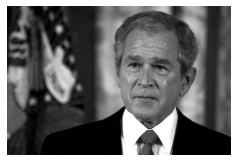

In [59]:
show_image(gray, 'gray')

#### Step 2 Detect face(s)

IMPORTANT: although the code detects multiple faces, it will work on the first face it finds. In production code we should process all the (possible) faces the code finds. To help with the assumption that we have only one face, `minSize` is set to a large value.

In [60]:
# Note that we don't have to download the XML file (commonly done in tutorials out there)
# opencv-python ships with the files; we just need to load them
faceCascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# See https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters/20805153#20805153
# for an explanation of the parameters
# And https://stackoverflow.com/questions/22249579/opencv-detectmultiscale-minneighbors-parameter/22250382#22250382
# specifically for `minNeighbors`
detected_faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.05,
    minNeighbors=5,
    # Use a large minimum size to avoid false positives
    # Helps with our assumption that the first face is the main one
    minSize=(100, 100),
    flags=cv2.CASCADE_SCALE_IMAGE
)

In [61]:
print('Found a face at {}'.format(detected_faces[0]))

Found a face at [264  70 221 221]


#### Step 4 Visualize the face(s)

This step is not strictly necessary for detection, but it is a good way  to visualize what the face detection algorithm has found.

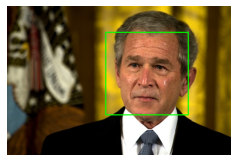

In [62]:
# Need to convert from OpenCV BGR to Matplotlib RGB
# https://stackoverflow.com/a/54959575
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for (x, y, w, h) in detected_faces:
    cv2.rectangle(rgb_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_image(rgb_image)

#### Step 5 Extract the face

Extract the first face we found and visualize it.

In [63]:
x, y, w, h = detected_faces[0]
face = gray[y:y+h, x:x+w]

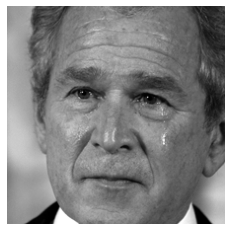

In [64]:
show_image(face, cmap='gray')

#### Step 6 Resize the extracted face to match classifier

Resize the image to match what the classifier was trained on.

In [65]:
from skimage import transform

# What the classifier was trained on
HEIGHT = 62
WIDTH = 47

test_image = transform.resize(face, (HEIGHT, WIDTH), anti_aliasing=True)

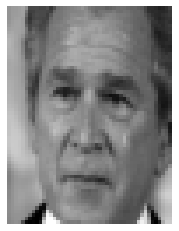

In [66]:
show_image(test_image, cmap='gray')

#### Step 7 Classify the face

Use the classifier we built above to predict the person's name.

In [67]:
# Convert from OpenCV 0.0-1.0 grayscale to the 0.0-255.0 used in the classifier
f = test_image.ravel() * 255

pred = svcclf.predict([f])
print('Predicted: {}'.format(faces.target_names[pred][0]))

Predicted: George W Bush


## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

### What have you learned from this assignment?

* Use DataFrame `describe()` to view summary statistics at a glance. All the important values are available with one function call.
* How much we get out-of-the-box from the `pandas_profiling` package. It is like a "mini EDA" with one line of code.
* Use the `verbose` parameter to follow the progress of long-running scikit-learn tasks.
* Pay attention to `random_state` in the scikit-learn APIs to get consistent results.
* Use `GridSearchCV()` to find parameters for a classifier.
* The power and simplicity of Naive Bayes classifiers, even for seemly complex tasks such as digit classification. It can be used as a baseline before attempting more complex solutions.
* How to use seaborn's heatmap for confusion matrix visualization. More specifically, the trick to zero out the diagonal with NumPy `fill_diagonal()` to make the mistakes stand out in the graph.
* How surprisingly good random forest classifiers perform, achieving 97% in the digit classification without much work. Another case of "try this before pulling your neural network card" case. Especially with the emphasis in _explainable AI_, random forests may have an edge because even layman can understand them.
* The small number of components we need to explain variability (the PCA section).
* Finally getting a chance to play with OpenCV and see first-hand how easy and feature-rich it is.

### Which parts were the most fun, time-consuming, enlightening, tedious?

**Time-consuming**

* Understand the shape of the input data scikit-learn needs in the APIs. Thankfully the _Python Data Science Handbook_ did a good job with the code samples.
* Image augmentation by hand. I'm sure there is library out there for this...

**Fun**

* All of it. I'm amazed people get paid to do this stuff. Very few other legal things are this fun.

**Enlightening**

* Several items listed in the "what have you learned" section. If I had to pick the top three, they would be:
    * The high accuracy of random forests.
    * PCA: the small number of components we need to explain much of the variability in a dataset.
    * How much can be achieved with a few lines of OpenCV code.
* The SVM classifier not improving with data augmentation.

**Tedious**

* None. I would skip sleep, eating and, reluctantly, interacting with my loved ones, to do more of this. The whole course was a blast.

### What would you do if you had an additional week to work on this?

* Get better at data augmentation, to deal with imbalanced datasets.
* Work on more complex face detection tasks, e.g. multiple faces in the same picture.